In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) that report risk to assets, capacity, and resulting risk to welfare on a simpliied map of the Philippines.
The map used is a [shapefile](https://en.wikipedia.org/wiki/Shapefile) from [GADM.org](http://gadm.org) that was simplified with  [mapshaper.org](http://mapshaper.org)

This first lines sets technical options for the python notebook. 

In [1]:
#clears memory for a fresh start
%reset-f

#ask python to reload the function definitons each time before executing the functions
%load_ext autoreload  
%autoreload 2

## Get the Data

In [2]:
import pandas as pd

In [3]:
df_with_results = pd.read_csv("df.csv", index_col="Province")
df_with_results.head()

,gdp_pc_pp,pop,plgp,unemp,bashs,pov_head,shew,ophe,gdp_pc_pp_nat,rel_gdp_pp,...,deltaW_nat,equivalent_cost,risk,total_equivalent_cost,total_equivalent_cost_of_nat_buyout,resilience,resilience_no_shock,resilience_no_shock_no_uspcale,resilience_no_shock_no_SP,risk_to_assets
Province,,,,,,,,,,,,,,,,,,,,,
Abra,133.688,240135.244121,0.8827,0.165,0.857720,0.373595,0.953416,0.031414,184.136685,0.726026,...,0.000493,1.218217,0.009112,292536.942611,250.694787,0.555923,0.556400,0.516817,0.448986,0.005066
Agusan Del Norte,179.014,661728.454375,0.7075,0.210,0.921445,0.346715,0.821277,0.034563,184.136685,0.972180,...,0.003865,3.513482,0.019627,2324971.035897,6090.633997,0.615612,0.617225,0.487129,0.345018,0.012083
Agusan Del Sur,126.492,677779.682154,0.6871,0.210,0.727442,0.480785,0.821277,0.034563,184.136685,0.686946,...,0.000833,1.150511,0.009096,779793.173142,1467.443833,0.432071,0.432884,0.309596,0.199328,0.003930
Apayao,158.732,116022.676390,0.6813,0.165,0.814192,0.613667,0.953416,0.031414,184.136685,0.862034,...,0.000006,0.051866,0.000327,6017.676082,2.222262,0.496068,0.496252,0.453814,0.384128,0.000162
Batangas,219.272,2485002.055465,0.8330,0.175,0.819596,0.190351,1.117207,0.034849,184.136685,1.190811,...,0.000121,0.020125,0.000092,50011.830069,885.731452,1.091834,1.111171,1.009102,0.868775,0.000100


## Map the data

The following library, coded for this project, allows to plot maps. To work proprerly, it requires that the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. (Inkspace is used to transform [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps into PDF and [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics)

In [4]:
#this library contains ad hoc functions, coded for this project, that allow to produce maps 
from maps_lib import * 

In [5]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

In [6]:
# path to the blank map (This paticular map was produced using thePhilippines map simplified withaa)
svg_file_path = "inputs/PHL_adm1_simplified.svg"

#### First block: risk to assets 

Missing in series: Aklan; Albay; Antique; Aurora; Basilan; Bataan; Batanes; Benguet; Biliran; Bohol; Camarines Norte; Camiguin; Catanduanes; Cavite; Cebu; Compostela Valley; Davao Del Sur; Davao Oriental; Dinagat Islands; Eastern Samar; Guimaras; Iloilo; Leyte; Marinduque; Masbate; Metropolitan Manila; Misamis Occidental; Misamis Oriental; Mountain Province; Negros Oriental; Northern Samar; Occidental Mindoro; Oriental Mindoro; Palawan; Quirino; Romblon; Shariff Kabunsuan; Siquijor; Sorsogon; Southern Leyte; Sulu; Surigao Del Norte; Surigao Del Sur; Tawi-Tawi; Zambales; Zamboanga Del Norte; Zamboanga Sibugay


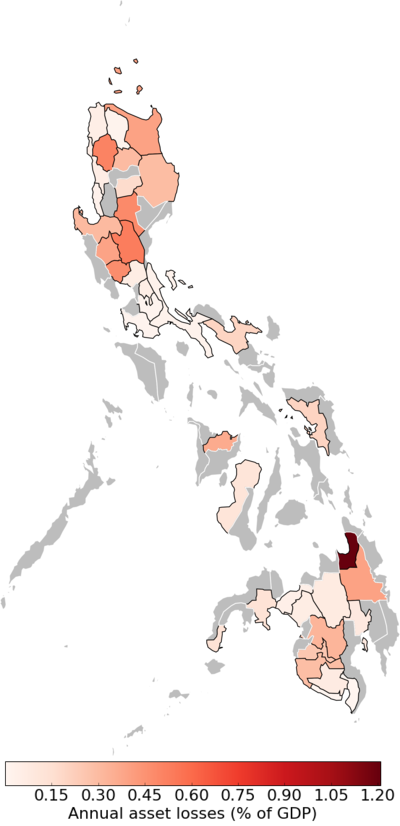

In [41]:
make_map_from_svg(
        df_with_results.risk_to_assets, 
        svg_file_path,
        outname="asset_risk", 
        color_maper=plt.cm.get_cmap("Reds"), 
        label="Annual asset losses (% of GDP)",
        new_title="Map of asset risk in the Philippines")

#### Second block: socio-economic capacity 

Missing in series: Aklan; Albay; Antique; Aurora; Basilan; Bataan; Batanes; Benguet; Biliran; Bohol; Camarines Norte; Camiguin; Catanduanes; Cavite; Cebu; Compostela Valley; Davao Del Sur; Davao Oriental; Dinagat Islands; Eastern Samar; Guimaras; Iloilo; Leyte; Marinduque; Masbate; Metropolitan Manila; Misamis Occidental; Misamis Oriental; Mountain Province; Negros Oriental; Northern Samar; Occidental Mindoro; Oriental Mindoro; Palawan; Quirino; Romblon; Shariff Kabunsuan; Siquijor; Sorsogon; Southern Leyte; Sulu; Surigao Del Norte; Surigao Del Sur; Tawi-Tawi; Zambales; Zamboanga Del Norte; Zamboanga Sibugay


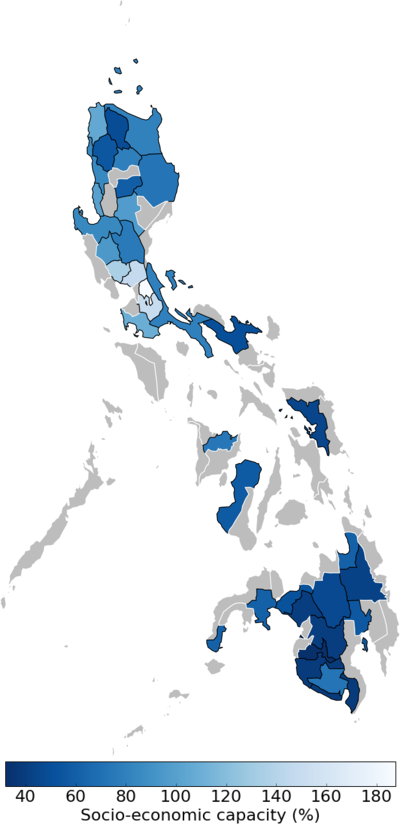

In [42]:
make_map_from_svg(
        df_with_results.resilience, 
        svg_file_path,
        outname="se_capacity", 
        color_maper=plt.cm.get_cmap("Blues_r"), 
        label="Socio-economic capacity (%)",
        new_title="Map of socio-economic capacity in the Philippines")

#### Total risk to welfare ($\frac {\text{asset risk}} {\text{socio-economic capacity}}$)

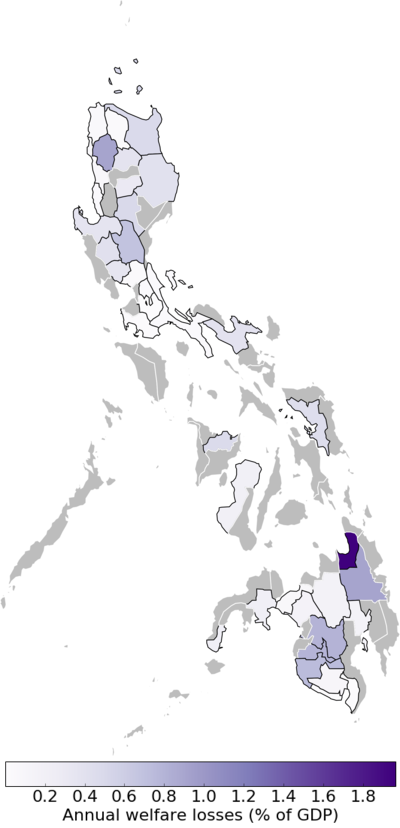

In [43]:
make_map_from_svg(
        df_with_results.risk, 
        svg_file_path,
        outname="welfare_risk", 
        color_maper=plt.cm.get_cmap("Purples"), 
        label="Annual welfare losses (% of GDP)",
        new_title="Map of welfare risk in the Philippines", verbose=False)